BREAST CANCER DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("breastCancer.csv")

In [5]:
df.head() #Top 5 data records

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.shape #Number of rows and columns

(699, 11)

In [7]:
df.dtypes #List the type of all columns

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [8]:
df.info() #Information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


We can see that there are 699 entries in total. We can say that there are 699 non-null values ​​in all columns. Dtype indicates the data type of the column. It is specified that 10 columns have the data type int64(integer) and 1 column has the -object- data type.

In [9]:
# Replace non-numeric values ​​with NaN
df['bare_nucleoli'] = pd.to_numeric(df['bare_nucleoli'], errors='coerce')

# Convert the column to Int64
df['bare_nucleoli'] = df['bare_nucleoli'].astype('Int64')

In [10]:
df=df.drop_duplicates()
df.shape

(691, 11)

In [11]:
df.info()
df = df.drop('id', axis=1) #Remove 'id' 

# Check the result
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 691 non-null    int64
 1   clump_thickness    691 non-null    int64
 2   size_uniformity    691 non-null    int64
 3   shape_uniformity   691 non-null    int64
 4   marginal_adhesion  691 non-null    int64
 5   epithelial_size    691 non-null    int64
 6   bare_nucleoli      675 non-null    Int64
 7   bland_chromatin    691 non-null    int64
 8   normal_nucleoli    691 non-null    int64
 9   mitoses            691 non-null    int64
 10  class              691 non-null    int64
dtypes: Int64(1), int64(10)
memory usage: 65.5 KB
   clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion   
0                5                1                 1                  1  \
1                5                4                 4                  5   
2                3      

In [12]:
df.isnull().sum() #Check if there is a null value

clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

In [13]:
df = df.dropna()  #Extracts rows with null values

In [14]:
df.isnull().sum() #Check again if there is a null value

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

Data Visualization

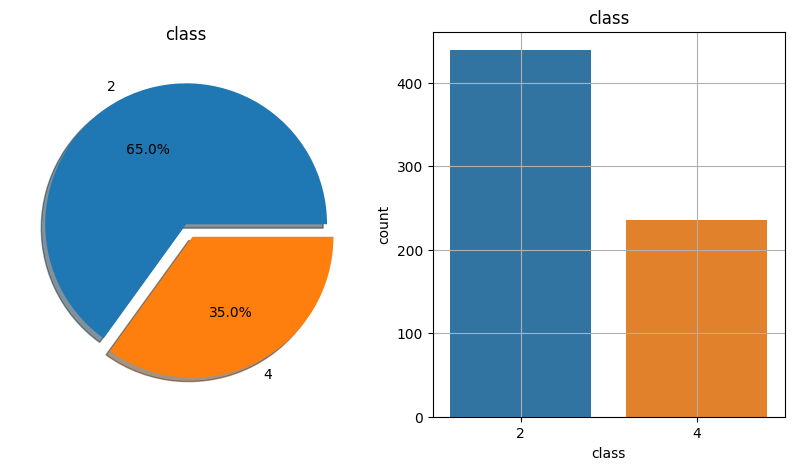

In [15]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

df['class'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('class')
ax[0].set_ylabel('')

sns.countplot(x='class', data=df, ax=ax[1])
ax[1].set_title('class')

N, P = df['class'].value_counts()

plt.grid()
plt.show()

Histogram Plot for Each Attribute

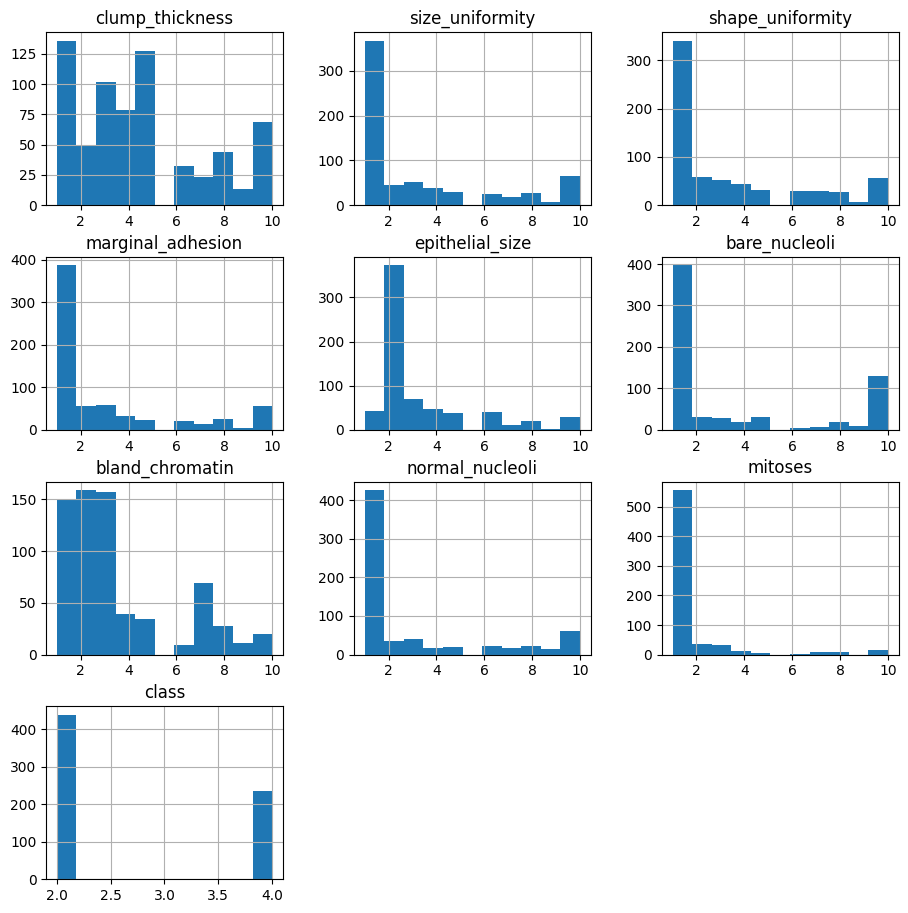

In [16]:
df.hist(bins=11,figsize=(11,11)) #With these graphs we can see the data distribution
plt.show()

array([[<Axes: xlabel='clump_thickness', ylabel='clump_thickness'>,
        <Axes: xlabel='size_uniformity', ylabel='clump_thickness'>,
        <Axes: xlabel='shape_uniformity', ylabel='clump_thickness'>,
        <Axes: xlabel='marginal_adhesion', ylabel='clump_thickness'>,
        <Axes: xlabel='epithelial_size', ylabel='clump_thickness'>,
        <Axes: xlabel='bare_nucleoli', ylabel='clump_thickness'>,
        <Axes: xlabel='bland_chromatin', ylabel='clump_thickness'>,
        <Axes: xlabel='normal_nucleoli', ylabel='clump_thickness'>,
        <Axes: xlabel='mitoses', ylabel='clump_thickness'>,
        <Axes: xlabel='class', ylabel='clump_thickness'>],
       [<Axes: xlabel='clump_thickness', ylabel='size_uniformity'>,
        <Axes: xlabel='size_uniformity', ylabel='size_uniformity'>,
        <Axes: xlabel='shape_uniformity', ylabel='size_uniformity'>,
        <Axes: xlabel='marginal_adhesion', ylabel='size_uniformity'>,
        <Axes: xlabel='epithelial_size', ylabel='size_uniform

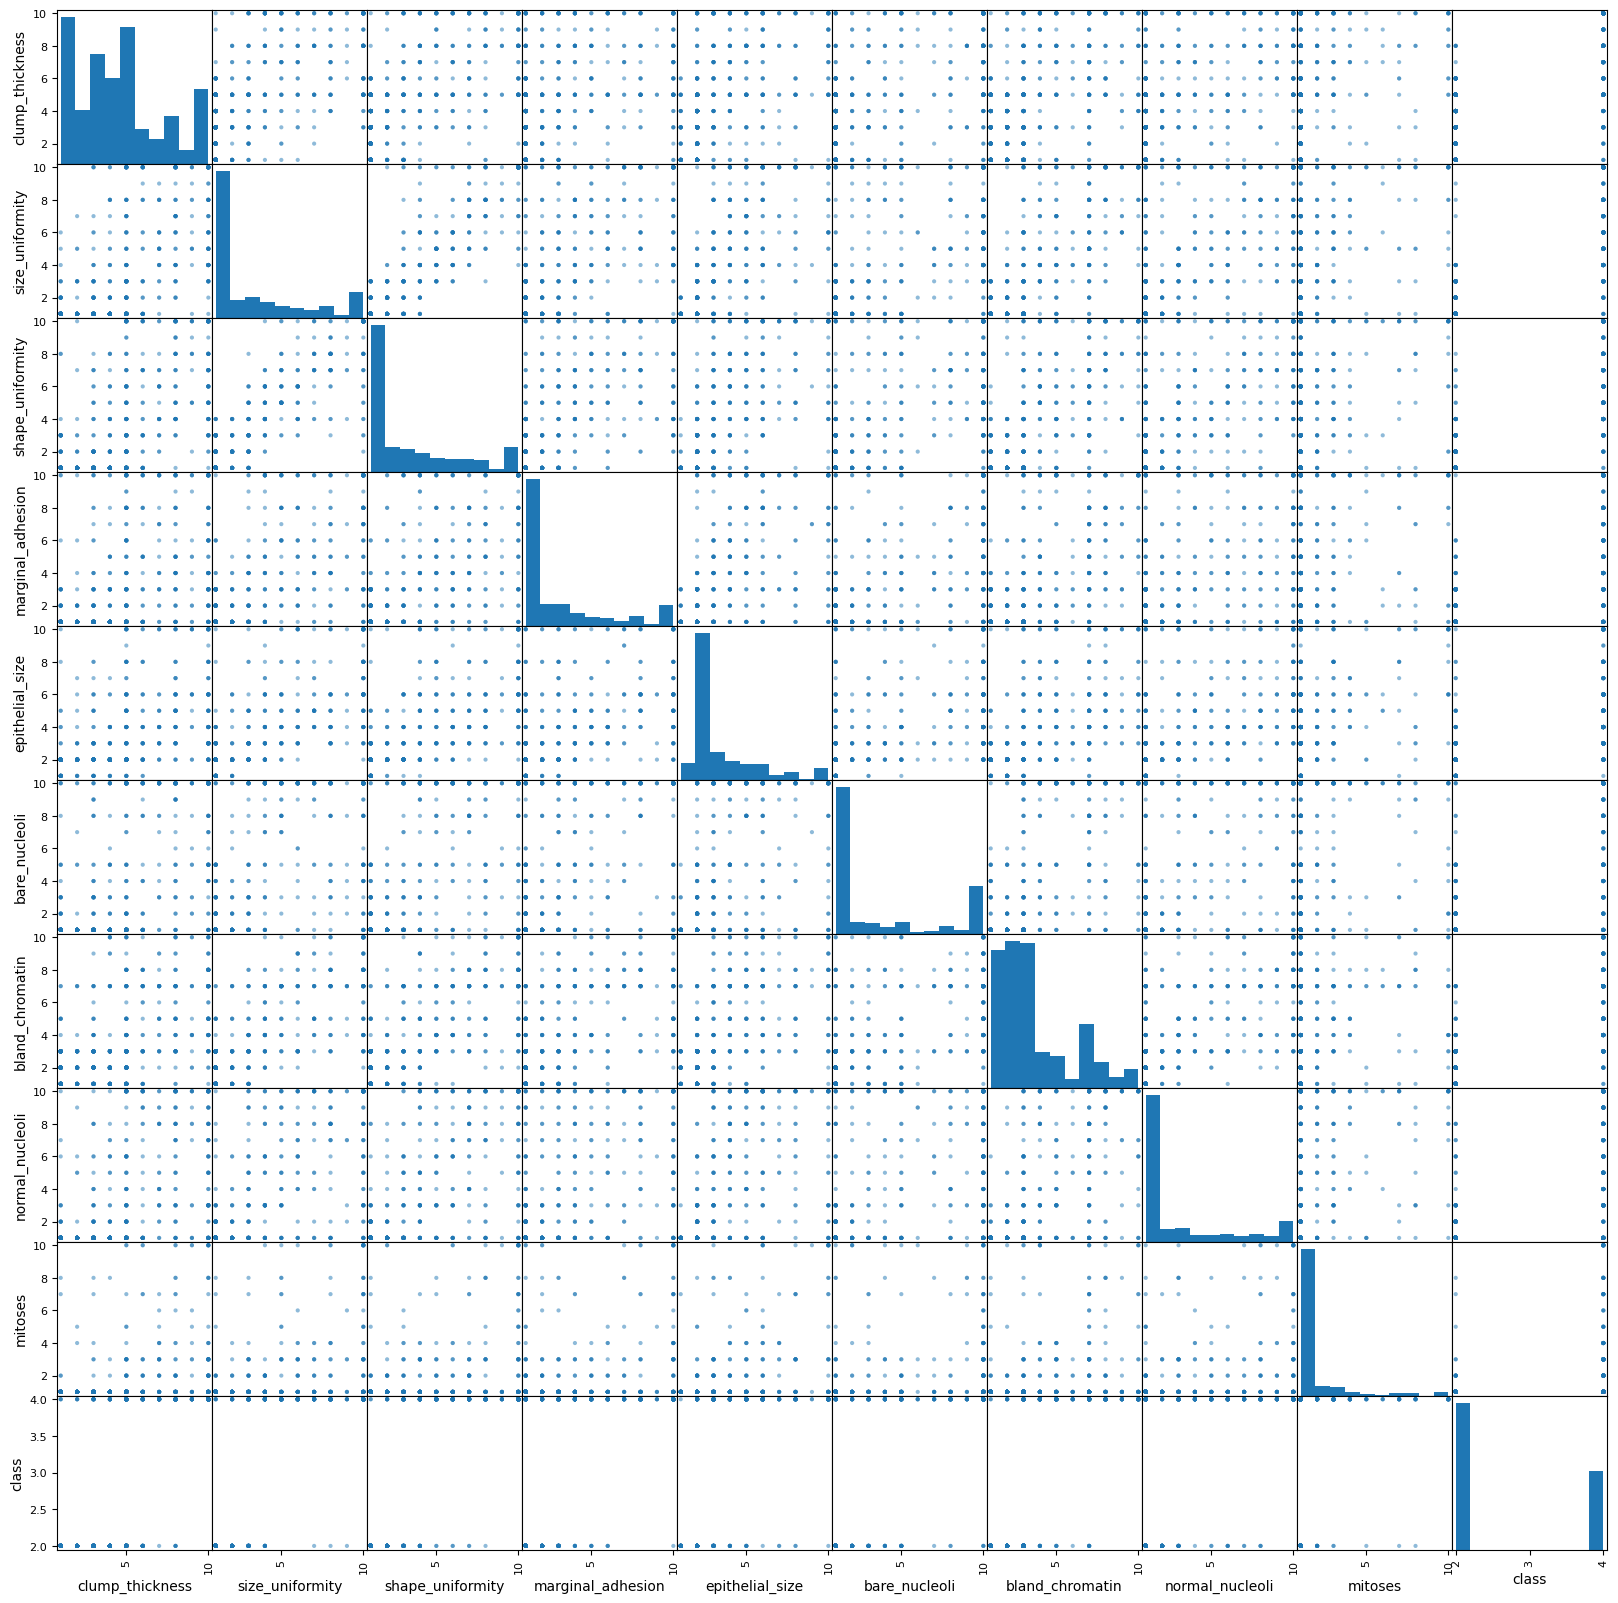

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20)) 
#We can examine the distribution matrices to understand the relationship between the 2 attributes.

Correlation Analysis

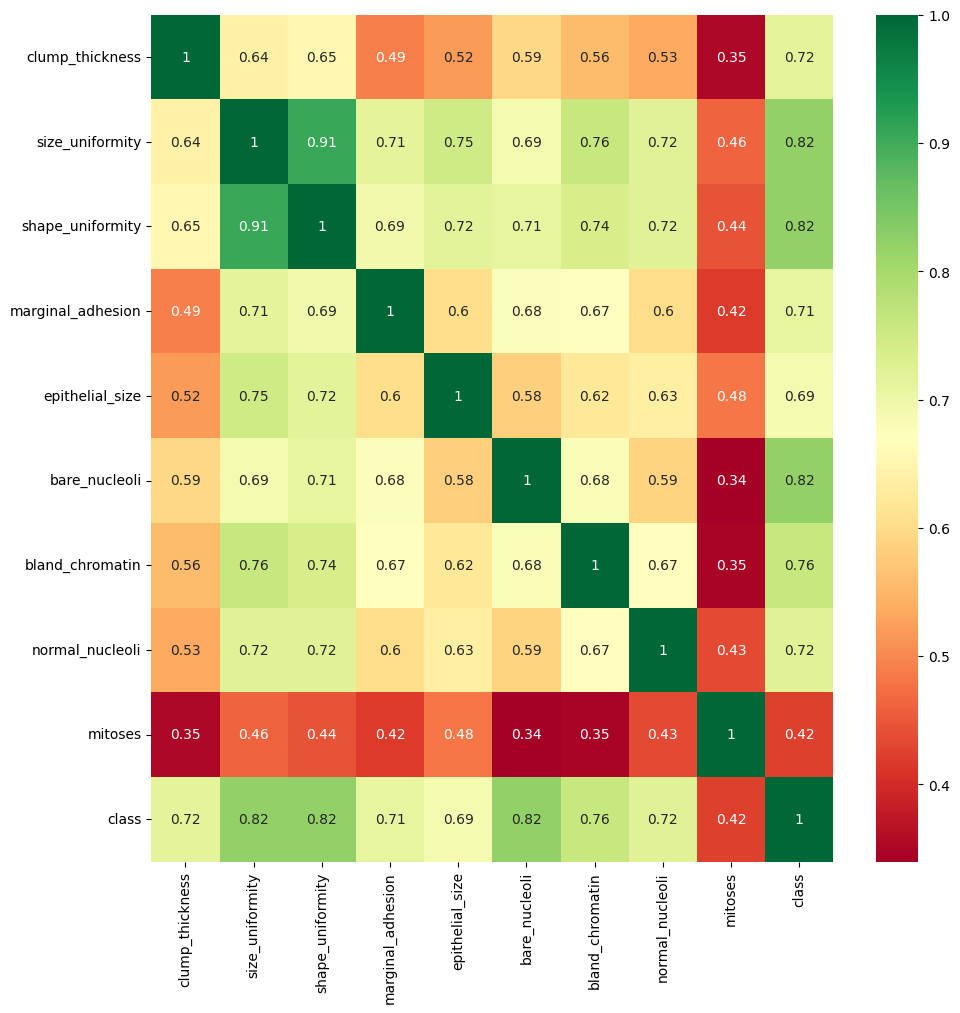

In [18]:
corr=df.corr()
top_corr_features=corr.index
plt.figure(figsize=(11,11))
#Heatmap
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=df['class']
X=df.drop('class',axis=1)
scaler.fit(X)
SSX=scaler.transform(X)

Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(SSX, y, test_size=0.15, random_state=0)

In [21]:
X_train.shape, y_train.shape

((573, 9), (573,))

In [22]:
X_test.shape, y_test.shape

((102, 9), (102,))

CLASSIFICATION ALGORITHMS

GradientBoostingClassifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

KNeigborsClassifier (KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

AdaBoostClassifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(n_estimators=500,learning_rate=0.1, random_state=0)
ab.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=0)

Random Forest

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)

param_grid = {
    'n_estimators': [300],
    # When we tried different numbers of trees, the best result was obtained with 300 trees.
}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'n_estimators': [300]}, scoring='accuracy')